In [ ]:
import numpy as np
from scipy.linalg import expm, sinm, cosm
import math
from numpy.linalg import inv
import matplotlib.pyplot as plt
from pylab import *
import control as ct

In [ ]:
# matrix-vector system description,
# dx/dt=Ax+Bu; y=Cx
# frequency w

def lprs(A, B, C, w):
    n = len(A)
    AINV = inv(A)
    I_n = np.identity(n)
    if w == 0:
        J_real = -0.5*C@AINV@B
        J_imag = 0.25*math.pi*C@AINV@B
    else:
        t = 2*math.pi/w
        AEXP=expm(0.5*A*t)
        AEXP2=expm(A*t)
        J_real = -0.5*C@(AINV+t*inv(I_n-AEXP2)@AEXP)@B
        J_imag = 0.25*math.pi*C@inv(I_n+AEXP)@(I_n-AEXP)@AINV@B
        #result.append((J_real, J_imag))
    return (J_real, J_imag)

In [ ]:
# funtion to compute state-space represenation of:
# G(\mu, s) = \frac{k}{(\mu s+1)^2(as+1)}
def ss_tf1(mu, k, a):
  if mu == 0:
    #G_num =  k
    #G_den = (as + 1)
    coeff_s1 = a
    coeff_s0 = 1
    num = [[[ k ]]]
    den = [[[coeff_s1, coeff_s0]]]
  else:
    #G_num =  k*(s+a)
    #G_den = (s**2 + 2*xi*s +1)*(mu*s + 1)**2 = a*mu^2*s^3 + (2*a*mu + mu^2)*s^2 + (a + 2*mu)*s^1 + 1*s^0
    coeff_s3 = a*mu**2
    coeff_s2 = 2*a*mu + mu**2
    coeff_s1 = a + 2*mu
    coeff_s0 = 1
    num = [[[ k ]]]
    den = [[[coeff_s3, coeff_s2, coeff_s1, coeff_s0]]]
  sys = ct.tf2ss(num, den)
  return sys

In [ ]:
# funtion to compute state-space represenation of:
# G(\mu, s) = \frac{K(s+a)}{(\mu s+1)^2(s^2+2\xi s +1)}
def ss_tf2(mu, k, a, xi):
  if mu == 0:
    #G_num =  k*(s+a)
    #G_den = (s**2 + 2*xi*s +1)
    coeff_s2 = 1
    coeff_s1 = 2*xi
    coeff_s0 = 1
    num = [[[ k, k*a ]]]
    den = [[[coeff_s2, coeff_s1, coeff_s0]]]
  else:
    #G_num =  k*(s+a)
    #G_den = (s**2 + 2*xi*s +1)*(mu*s + 1)**2
    coeff_s4 = mu**2
    coeff_s3 = 2*mu*(xi*mu + 1)
    coeff_s2 = mu**2 + 4*xi*mu + 1
    coeff_s1 = 2*(mu + xi)
    coeff_s0 = 1
    num = [[[ k, k*a ]]]
    den = [[[coeff_s4, coeff_s3, coeff_s2, coeff_s1, coeff_s0]]]
  sys = ct.tf2ss(num, den)
  return sys

In [ ]:
# Function that computes J(w) for a given range of frequencies
def lprs_vec(A, B, C, J_real_list, J_imag_list, w_start, w_end, step):
    for w in np.arange(w_start, w_end, step):
        (J_real, J_imag) = lprs(A, B, C, w)  # A, B, C now come from arguments
        J_real_list.append(float(J_real))
        J_imag_list.append(float(J_imag))
    return J_real_list, J_imag_list


In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
k = 1.
a = 2.
w_start, w_end, step = 0, 5000, 0.1

# Define mu values
mu_values = [0, 0.0001, 0.1]

# Storage for results
J_real_results = {}
J_imag_results = {}

for mu in mu_values:
    sys_ex = ss_tf1(mu, k, a)  # Compute system
    A, B, C, D = sys_ex.A, sys_ex.B, sys_ex.C, sys_ex.D
    sys_ex_tf = ct.ss2tf(A, B, C, D)  # Convert to transfer function
    print(f"mu = {mu}:\n{sys_ex_tf}\n")

    # Compute J(w)
    J_real, J_imag = lprs_vec(A, B, C, [], [], w_start, w_end, step)

    # Store results
    J_real_results[mu] = J_real
    J_imag_results[mu] = J_imag


mu = 0:
<TransferFunction>: sys[43]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.5
-------
s + 0.5




<ipython-input-11-206165f19f8d>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_real_list.append(float(J_real))
<ipython-input-11-206165f19f8d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_imag_list.append(float(J_imag))


mu = 0.0001:
<TransferFunction>: sys[47]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1.819e-11 s^2 + 8.941e-08 s + 5e+07
-----------------------------------
 s^3 + 2e+04 s^2 + 1e+08 s + 5e+07


mu = 0.1:
<TransferFunction>: sys[51]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-1.066e-14 s^2 - 7.105e-14 s + 50
---------------------------------
   s^3 + 20.5 s^2 + 110 s + 50




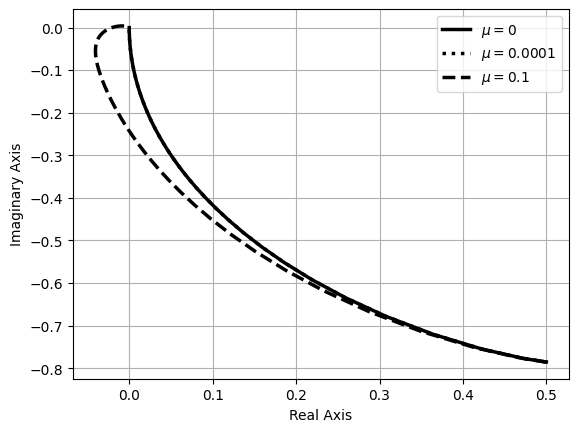

In [ ]:
fig, ax = plt.subplots()

# Define line styles for different mu values
line_styles = {
    0: "-",
    0.0001: ":",
    0.1: "--"
}

for mu in mu_values:
    ax.plot(J_real_results[mu], J_imag_results[mu], color='k', label=f'$\mu = {mu}$', linewidth=2.5, linestyle=line_styles[mu])

plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.grid()
plt.legend()
plt.show()


In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
k = 1.
a = 0.
xi = 1.
w_start, w_end, step = 0, 5000, 0.1

# Define mu values
mu_values = [0, 0.00, 0.1]

# Storage for results
J_real_results = {}
J_imag_results = {}

for mu in mu_values:
    sys_ex = ss_tf2(mu, k, a, xi)  # Compute system
    A, B, C, D = sys_ex.A, sys_ex.B, sys_ex.C, sys_ex.D
    sys_ex_tf = ct.ss2tf(A, B, C, D)  # Convert to transfer function
    print(f"mu = {mu}:\n{sys_ex_tf}\n")

    # Compute J(w)
    J_real, J_imag = lprs_vec(A, B, C, [], [], w_start, w_end, step)

    # Store results
    J_real_results[mu] = J_real
    J_imag_results[mu] = J_imag


mu = 0:
<TransferFunction>: sys[31]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      s
-------------
s^2 + 2 s + 1




<ipython-input-11-206165f19f8d>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_real_list.append(float(J_real))
<ipython-input-11-206165f19f8d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_imag_list.append(float(J_imag))


mu = 0.0:
<TransferFunction>: sys[35]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      s
-------------
s^2 + 2 s + 1


mu = 0.1:
<TransferFunction>: sys[39]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-7.105e-15 s^3 - 1.137e-13 s^2 + 100 s - 9.948e-14
--------------------------------------------------
       s^4 + 22 s^3 + 141 s^2 + 220 s + 100




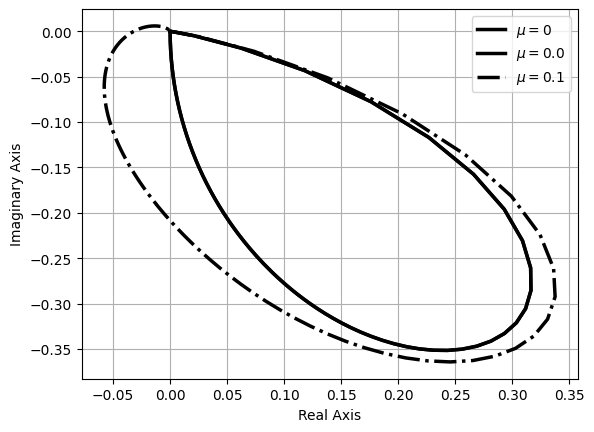

In [ ]:
fig, ax = plt.subplots()

# Define line styles for different mu values
line_styles = {
    0: "-",
    0.001: ":",
    0.01: "--",
    0.1: "-."
}

for mu in mu_values:
    ax.plot(J_real_results[mu], J_imag_results[mu], color='k', label=f'$\mu = {mu}$', linewidth=2.5, linestyle=line_styles[mu])

plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.grid()
plt.legend()
plt.show()


In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
k = 1.
a = 0.
w_start, w_end, step = 0, 5000, 0.1

# Define mu values
mu_values = [0, 0.1, 1]

# Storage for results
J_real_results = {}
J_imag_results = {}

for mu in mu_values:
    sys_ex = ss_tf1(mu, k, a)  # Compute system
    A, B, C, D = sys_ex.A, sys_ex.B, sys_ex.C, sys_ex.D
    sys_ex_tf = ct.ss2tf(A, B, C, D)  # Convert to transfer function
    print(f"mu = {mu}:\n{sys_ex_tf}\n")

    # Compute J(w)
    J_real, J_imag = lprs_vec(A, B, C, [], [], w_start, w_end, step)

    # Store results
    J_real_results[mu] = J_real
    J_imag_results[mu] = J_imag


mu = 0:
<TransferFunction>: sys[67]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1
-
1




<ipython-input-11-206165f19f8d>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_real_list.append(float(J_real))
<ipython-input-11-206165f19f8d>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_imag_list.append(float(J_imag))


mu = 0.1:
<TransferFunction>: sys[71]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      100
----------------
s^2 + 20 s + 100


mu = 1:
<TransferFunction>: sys[75]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-4.441e-16 s + 1
----------------
 s^2 + 2 s + 1




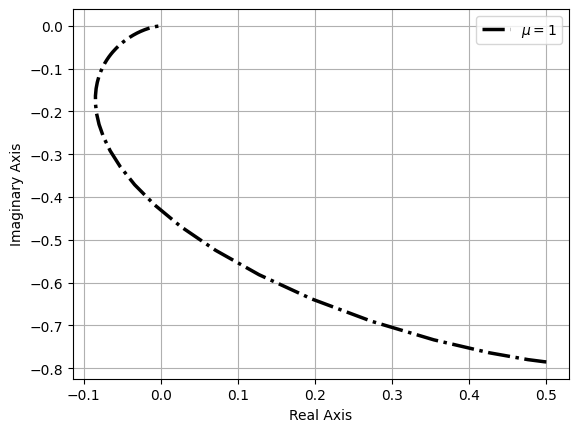

In [ ]:
fig, ax = plt.subplots()
mu_values = [1]

# Define line styles for different mu values
line_styles = {
    0: "-",
    0.1: ":",
    1: "-."
}
for mu in mu_values:
    ax.plot(J_real_results[mu], J_imag_results[mu], color='k', label=f'$\mu = {mu}$', linewidth=2.5, linestyle=line_styles[mu])

plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.grid()
plt.legend()
plt.show()


In [ ]:
print("End of the experiments")